In the following exercise, we will use open data provided by the Compact Muon Solenoid (CMS) experiment to extract various properties of the Z Boson. Our objectives are (1) find the Z Boson in the data, (2) measure its mass, and (3) determine the lifetime of the particle. We will subsequently compare the values we measured to the "known" values.

# Step 1: Watch a Video until 1:15

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/pQhbhpU9Wrg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In this video, several animations are played in sequence to demonstrate all the steps of how protons are collected from containers of Hydrogen and ultimatley sent through to the LHC accompanied with some nasty Dubstep music. What's not to love about this video? Unfortunately, many of the animations in the video run through the particular names of each apparatus too quickly for the viewer to read. However, in the context of "watch this video until 1:15 after having read the several paragraphs before this prompt", the video serves as a recap of the content and not as an explanatory device.

### Question 1: Describe behavior and detection of Muons in CMS

Muons are weakly-interacting particles. Their detection relies not on detection in the Electromagnetic Calorimeter (ECAL) or Hadron Calorimeter (HCAL), but on several "Muon chambers" that are located "behind" the ECAL and HCAL detectors. Since Muons are negatively charged, they will interact with the magnetic field according to the Lorentz Force Law, $\textbf{F} = q \textbf{v} \times \textbf{B}$, and thus their trajectories will curve. CMS measures the momentum of the Muons through their interaction with the Muon chambers, but the energy of the Muons must be "reconstructed" by measuring other quantities and then "working backwards" to obtain the energy.

### Question 2: Calculate the Z Boson Invariant Mass using Detection of two Muons

We normally use 4-vectors to write the momentum and energy of a particle: $p^{\mu} = (\frac{E}{c}, \textbf{p})$. So, conservation of energy and momentum can be succinctly expressed as: $p_{Z}^{\mu} = p_{\mu_{1}}^{\mu} + p_{\mu_{2}}^{\mu}$. If we square both sides and perform a lot of algebra, we will eventually end up with an expression that relates the energies of the Muons to the invariant mass, $M$. That equation is $M = \sqrt{2 E_{1} E_{2} (1 - cos \theta)}$. It is customary to, instead of using the spherical angle $\theta$, define the pseudorapidity as $\eta$ as $\eta \equiv - ln (tan \theta )$. With this and the standard azimuthal angle in spherical coordinates $\phi$, the equation above is rewritten as $M = \sqrt{ 2 p_{T_{2}} p_{T_{1}} (cosh(\eta_{1} - \eta_{2}) - cos(\phi_{1} - \phi_{2})) }$ where $p_{T_{j}}$ is the transverse momentum of the $j-$th particle. We apply this equation below to calculate the invariant mass.

In [2]:
import numpy as np
import pandas as pd
import astropy as ap
import matplotlib.pyplot as plt

In [3]:
muon_1_transverse_momentum = 58.6941
muon_1_pseudorapidity = -1.02101
muon_1_azimuthal_angle_in_radians = 0.836256
muon_2_transverse_momentum = 45.7231
muon_2_pseudorapidity = -0.37030
muon_2_azimuthal_angle_in_radians = 2.741820

Before we do anything more, we need to recall if np.trig() evaluates in terms of radians or degrees.

In [4]:
print(np.cos(0), np.cos(1), np.sin(0), np.sin(1))
print(np.cosh(0), np.cosh(1), np.sinh(0), np.sinh(1))

1.0 0.5403023058681398 0.0 0.8414709848078965
1.0 1.5430806348152437 0.0 1.1752011936438014


The fact that np.cos(1) and np.cosh(1) evaluates to $0.5403...$  and $1.543...$ is evidence that these functions are taking in radians. Thus, we don't need to worry about converting our given quantities to degrees in the following calculations. 

We now consider the units of the invariant mass. Since the quantity $cosh(\eta_{1} - \eta_{2}) - cos(\phi_{1} - \phi_{2})$ has no units, the units come directly from the product of the transverse momenta, $p_{T_{j}}$. Since the quantites are given with units of $GeV/c$, we know that the units of the invariant mass will be $GeV/c$. This is eludicated by considering the product of $p_{T1}$ and $p_{T2}$, producing units of $(GeV/c)^{2}$, and then taking the square root of this, which will return $GeV/c$, of course. Does this make sense? From $E = mc^{2}$, we know that mass can be expressed in terms of energy divided by the speed of light. Thus, we conclude that this operation will give us a number with the units of mass. Now, we perform the operation.

In [5]:
invariant_mass = np.sqrt(
    2 * muon_1_transverse_momentum * muon_2_transverse_momentum * 
    (np.cosh(muon_1_pseudorapidity - muon_2_pseudorapidity) - 
     np.cos(muon_1_azimuthal_angle_in_radians - muon_2_azimuthal_angle_in_radians)))
print(f"We calculated the invariant mass to be {invariant_mass} MeV/c.")

We calculated the invariant mass to be 91.14709147440797 MeV/c.


According to the Particle Data Group (PDG), the mass of the $Z$ Boson is reported to be $91.1876 \pm 0.0021$GeV (resource available at [https://pdg.lbl.gov/2022/tables/contents_tables.html]). Of course, it's clear here that they've set $c = 1$, like many particle physicist do. How close were we?

In [6]:
pdg_z_boson_mass = 91.1876
print(f"We were within {np.abs(invariant_mass - pdg_z_boson_mass)/pdg_z_boson_mass * 100}% of the value of the Z Boson mass as reported by PDG.")

We were within 0.04442328298149224% of the value of the Z Boson mass as reported by PDG.


### Question 3: Data Analysis

First, we obtain a comma-separated value (CSV) file containing tons of data of pairs of Muons detected in the Muon chambers. We can do this using Pandas' read_csv() method and reading the file directly off of GitHub.

In [7]:
ds = pd.read_csv("https://raw.githubusercontent.com/cms-opendata-education/zboson-exercise/master/DoubleMuRun2011A.csv")

We use the Pandas method head() to obtain the first five rows of this file. (If we printed any more, we'd risk setting our computer on fire.)

In [8]:
ds.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.69873,-9.510430,0.366205,1.86329,9.51748,0.194546,3.10311,...,G,9.76332,7.327710,-1.152370,6.34728,7.41776,0.775564,-0.155984,1,17.49220
1,165617,75100943,G,6.20385,-4.266610,0.456545,-4.47930,4.29097,-0.912070,3.03499,...,G,9.66898,7.273970,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1,11.55340
2,165617,75587682,G,19.28920,-4.212080,-0.651623,18.81210,4.26219,2.190460,-2.98811,...,G,9.82439,4.343940,-0.473505,8.79849,4.36967,1.449670,-0.108575,1,9.16361
3,165617,75660978,G,7.04268,-6.326780,-0.268545,3.08025,6.33248,0.469033,-3.09917,...,G,5.58571,4.474760,0.848935,-3.23185,4.55458,-0.660499,0.187488,1,12.47740
4,165617,75947690,G,7.27507,0.102966,-5.533080,-4.72122,5.53403,-0.773616,-1.55219,...,G,7.31811,-0.398831,6.940810,2.28247,6.95226,0.322677,1.628190,1,14.31590


Now, we must use the actual data to calculate the invariant mass of the Z Boson. We are relying on Pandas DataFrames' incredible ability to let us only write a single line of code to perform the calculation across every row in the tremendously large CSV file. We are guided again by the equation we wrote above, but we need to now use the numbers in the data.

In [9]:
invariant_mass_calculated_with_data = np.sqrt(2 * ds.pt1 * ds.pt2 * (np.cosh(ds.eta1 - ds.eta2) - np.cos(ds.phi1 - ds.phi2)))

We are now instructed to copy/paste given code that will tell us if we did the calculation correctly. That code is pasted below:

In [10]:
print(f"The first five values for the invariant mass of the Z Boson are (in GeV with c = 1)\n [{invariant_mass_calculated_with_data[0:5]}].")

if 14.31 <= invariant_mass_calculated_with_data.values[4] <= 14.32:
    print('Invariant mass values are correct!')
else:
    print("""
    Calculated values are not yet correct. Please check the calculation one more time. 
    Remember: don´t change the name of the variable invariant_mass.""")

The first five values for the invariant mass of the Z Boson are (in GeV with c = 1)
 [0    17.490875
1    11.551382
2     9.160909
3    12.475632
4    14.314303
dtype: float64].
Invariant mass values are correct!


### Question 4: Creating the Histogram

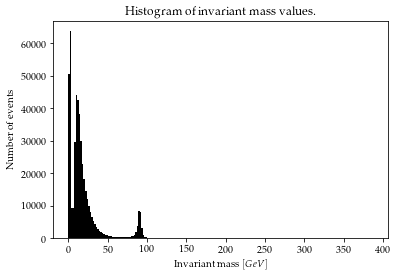

In [11]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

plt.hist(
    invariant_mass_calculated_with_data, 
    bins = 200, 
    range = (np.min(invariant_mass_calculated_with_data), np.max(invariant_mass_calculated_with_data)),
    color = "black")
plt.xlabel(r'Invariant mass $[GeV]$')
plt.ylabel(r'Number of events')
plt.title(r'Histogram of invariant mass values.')
plt.show()

Our first histogram has a fairly odd shape. We notice three peaks. The first looks like it's around 0-10 somewhere. That would correspond to the invariant mass of the two Muons being equal to about 0-10. Of course, if this were the case, then we cannot conclude that that pair of Muons came from a $Z$ Boson, because the mass of the $Z$ Boson is about 91 MeV (c = 1 hereafter). Another peak is located at somewhere between 15-30. Once again, if we suppose that the invariant mass of the two Muons is in fact in this range, then the two muons must not have come from a $Z$ Boson. Finally, the last peak we notice is centered around 90, and this is clearly the peak of interest here. Muons whose invariant mass corresponds to this quantity are likely to have come from a $Z$ Boson decay.

Of course,we see  that our histogram goes all the way our to 400 GeV. From the Matplotlib plotting function, it's clear that there must be at least a few events where the two Muons' invariant mass is somewhere between 350-400 GeV. Since it's not visible to the eye, we can replot the histogram to exclude invariant masses that are below 80 GeV beyond 115 GeV with the range parameter.

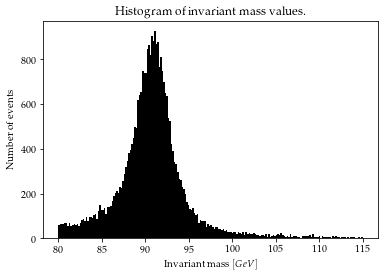

In [12]:
plt.hist(
    invariant_mass_calculated_with_data, 
    bins = 200, 
    range = (80, 115),
    color = "black")
plt.xlabel(r'Invariant mass $[GeV]$')
plt.ylabel(r'Number of events')
plt.title(r'Histogram of invariant mass values.')
plt.show()

Now, we need to fit a function to the histogram data in order to extract information about the $Z$ Boson lifetime. The function in question is Breit-Wigner distribution. It describes the number of events at a particular energy, and includes two other parameters that must be "guessed". Those parameters are $M$ and $\Gamma$. M is the maximum mass value detected, and $\Gamma$ is the full width at half maximum (FWHM) of the distribution.

We are now tasked with making guesses for these parameters. Using the above histogram, we can eyeball what might be a good value for $\Gamma$ by guessing the width of the distribution at the horizonal line characterized by half the value corresponding to the maximum of the distribution. It appears the peak of the is about $975$ at a value of $91$ or $92$ GeV. Thus, our guess for $M$ is $91.5$GeV Thus, halving $975$ gives us $487.5$. Traveling down to the imaginary horizonal line at $487.5$ (number of events), we can guess that $\Gamma$ is equal to $93-87 = 6$.

In [13]:
initial_guesses_for_BW_fit = [6, 91.5, -2, 200, 13000]

We will now follow the posted code to obtain the fit.

Optimizing...
gamma = 3.9240905958861076 pm 0.07790682578908233
(M) = 90.79835810508943 pm 0.030519464667059126
a = -1.640058529707502 pm 0.1266756978607518
b = 167.95350700235318 pm 12.78731048547556
A = 124862.37540293108 pm 1719.9974609787575


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


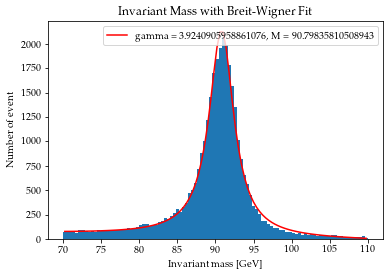

In [14]:
lower_limit_of_distribution = 70
upper_limit_of_distribution = 110
total_bins = 100

mass_histogram = plt.hist(
    invariant_mass_calculated_with_data[(invariant_mass_calculated_with_data > lower_limit_of_distribution) & 
                                        (invariant_mass_calculated_with_data < upper_limit_of_distribution)], 
    bins = total_bins, 
    range = (lower_limit_of_distribution, upper_limit_of_distribution))

y_events = mass_histogram[0]
x_center_of_bins = 0.5 * (mass_histogram[1][0:-1] + mass_histogram[1][1:] )

def breit_wigner_fit(E, gamma, M, a, b, A):
    constant_numerator = 2 * np.sqrt(2) * M * gamma * (np.sqrt(np.power(M, 2) * np.sqrt(np.power(M, 2) + np.power(gamma, 2))))
    constant_denominator = np.pi * np.sqrt(np.power(M, 2) + np.sqrt(np.power(M, 2) * (np.power(M, 2) + np.power(gamma, 2))))
    denominator = np.power(np.power(E, 2) - np.power(M, 2), 2) + np.power(M, 2) * np.power(gamma, 2)                                                  
    return a * E + b + A * ((constant_numerator/constant_denominator)/denominator)

from scipy.optimize import curve_fit
best, covariance = curve_fit(
    breit_wigner_fit, 
    x_center_of_bins, 
    y_events, 
    p0 = initial_guesses_for_BW_fit, 
    sigma = np.sqrt(y_events))
error = np.sqrt(np.diag(covariance))
    
print("Optimizing...")
print(f"""gamma = {best[0]} pm {error[0]}
(M) = {best[1]} pm {error[1]}
a = {best[2]} pm {error[2]}
b = {best[3]} pm {error[3]}
A = {best[4]} pm {error[4]}""")

plt.plot(x_center_of_bins, breit_wigner_fit(x_center_of_bins, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]))
plt.xlabel(r'Invariant mass [GeV]')
plt.ylabel(r'Number of event')
plt.title(r'Invariant Mass with Breit-Wigner Fit')
plt.legend()
plt.show()

### Question 5: Describe the Plot and Fit

The first thing we point out is that the fit is decent (except for the right tail. As the background exponentially decays, our fit gets more "loose".) Our initial guesses were $\Gamma = 6$ and $M = 91.5$, and we have extracted that $\Gamma = 3.92 \pm 0.08$ and $M = 90.8 \pm 0.03$. We can say with some certainty that this distribution of invariant mass of the two Muons comes from the particular decay channel of the $Z$ Boson. With our experimental data, we define the mass of the $Z$ Boson to be $M_{Z^{0}} = 90.8 \pm 0.03$ GeV. The PDG reports that ${M_{Z^{0}}} = 91.1876 \pm 0.0021$ GeV. Unfortunately, we did not overlap with the PDG reported value, not even within 5$\sigma$. However, we might guess that the PDG has used a tremendous amount more data to perform the measurement of the mass of the $Z$ Boson that they also have improved statistics.

### Question 6: Calculate the Lifetime of the $Z$ Boson

We know that the lifetime of the $Z$ Boson (as is given) is calculated with the parameter $\Gamma$ in the following way: $\Gamma = \frac{\hbar}{\tau}$. Rearranging, all we need to compute is $\frac{\hbar}{\Gamma}$ to extract the lifetime of the $Z$ Boson. Taking care with units, we proceed.

In [15]:
from scipy.constants import hbar, speed_of_light

In [20]:
lifetime_of_Z = hbar / (best[0] * (1.602e-10))
print(f"We calculated the lifetime of the Z Boson to be {lifetime_of_Z} seconds.")

We calculated the lifetime of the Z Boson to be 1.6775466910161886e-25 seconds.


### Question 7: When was the $Z$ Boson first detected, and what is it physically?

The $Z$ Boson is a vector Boson (spin 1) that mediates the weak interaction. In other words, it is a force-carrying particle. The $Z$ Boson was discovered in 1983 at CERN with the Super Proton Synchrotron.

### Question 8: If $E$ and $\textbf{P}$ could be measured with infinite precision, would there be a single peak in the invariant mass distribution?

If the energy and momentum of the di-Muon decay could be measured with infinite precision, then the equation we derived for the invariant mass would yield an exact result. However, because there are several other processes that may produce two Muons, we cannot say with certainty that there will only be a single peak in the invariant mass distribution. Our original histogram in fact featured two other peaks, one centered at about $0-1$ GeV (likely systematics issue) and another one centered around $15-30$ GeV. We are led to think that there there will likely not be just a single peak in the distribution.

### Question 9: Creation of Histogram of Whole Distribution

We now produce a plot that will inform us how the number of di-Muon detections vary as a function of the invariant mass. We will simply copy/paste the provided code to produce the plot. 

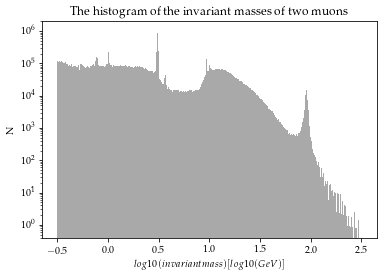

In [18]:
invariant_mass_1 = ds['M']

number_of_bins = 500
inv_mass_log = np.log10(invariant_mass_1)
weights = []
for masses in invariant_mass_1:
    weights.append(number_of_bins / np.log(10) / masses)

plt.hist(
    inv_mass_log, 
    number_of_bins, 
    range = (-0.5, 2.5), 
    weights = weights, 
    lw = 0, 
    color = "darkgrey")
plt.yscale('log')
plt.xlabel(r'$log10(invariant mass) [log10(GeV)]$')
plt.ylabel(r'N')
plt.title(r'The histogram of the invariant masses of two muons')
plt.show()

### Question 10: Does the above histogram appear similar to the one published by CMS?

The histogram we've produced does in fact look similar to the one published by CMS. From the right to the left, it includes the familiar peaks produced by the decay of the $Z$ Boson to two Muons, the peak for $\Upsilon$, $\Psi'$, $J/\Psi$, $\phi$, $\rho$ and $\omega$, and perhaps barely $\eta$. The peak for the $Z$ Boson coincides with a little less than 100GeV on this plot, which is what we've reproduced numerous times in this analysis. Also, it is clear from this plot that, if peaks indicate particles from which the two Muons were produced, then there are multiple processes that contribute to the producion of two muons. Because we are plotting the invariant mass on a logarithmic plot, we have managed to effectively separate the peaks near 0-1 GeV and 15-30GeV invariant mass into their constituent processes.

### Question 11: How does pseudorapidity affect the measurement of the invariant mass?

We will now separate the data provided to us into Muons measured with high and low pseudorapidity. We are performing this study in order to learn if pseudorapidity affects the measurement of the invariant mass.

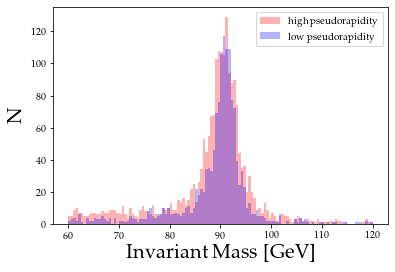

In [22]:
small_pseuodrapidity = ds[(np.abs(ds.eta1) < 0.38) & (np.abs(ds.eta2) < 0.38)]
large_pseuodrapidity = ds[(np.abs(ds.eta1) > 1.52) & (np.abs(ds.eta2) > 1.52)]

invariant_mass_with_high_pseudorapidity = large_pseuodrapidity['M']
invariant_mass_with_low_pseudorapidity = small_pseuodrapidity['M']

plt.hist(
    invariant_mass_with_high_pseudorapidity, 
    bins = 120, 
    range = (60, 120),
    color = "red",
    alpha = 0.3
)
plt.hist(
    invariant_mass_with_low_pseudorapidity, 
    bins = 120, 
    range = (60, 120),
    color = "blue",
    alpha = 0.3
)
plt.ylabel(r'N', fontsize = 20)
plt.legend(['high pseudorapidity', 'low pseudorapidity'])
plt.xlabel(r'Invariant Mass [GeV]', fontsize = 20)
plt.show()

We see that the width of the peak is much broader in the case of low pseudorapidity, which physically corresponds to the Muons striking the detector at angles nearing 90 degrees perpendicular to the beam direction. The peak is much narrower at high pseudorapidity.  